# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [6]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

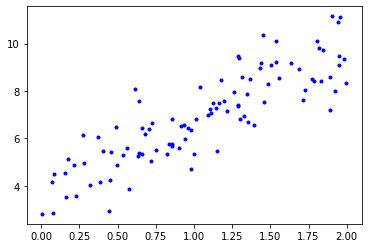

In [ ]:
plt.plot(X, y, "b.")
plt.show()

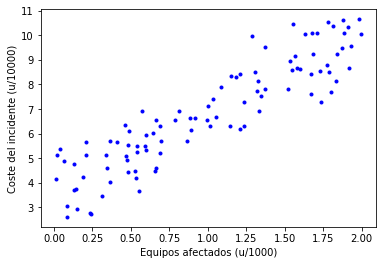

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show() #cuando aumentan los equipos afectados aumenta el coste del incidente

### 3. Modificación del conjunto de datos

In [9]:
import pandas as pd

In [10]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} #sabemos que a traves de un diccionario con pantas podemos crear una tabla
df = pd.DataFrame(data) #todo en minuscula y con _
df.head(10)
#tenemos una lista de listas entonces lo que hace flatten es dejarnoslo en una lista solo (es como aplandado)

,n_equipos_afectados,coste
0,0.130534,4.772107
1,0.658558,4.461567
2,0.809726,6.902696
3,1.210484,6.192595
4,0.145736,3.740110
5,0.919344,6.632497
6,1.731847,8.554178
7,1.774903,8.788957
8,1.287688,9.959862
9,0.539779,5.235966


In [11]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,130,47721
1,658,44615
2,809,69026
3,1210,61925
4,145,37401
5,919,66324
6,1731,85541
7,1774,87889
8,1287,99598
9,539,52359


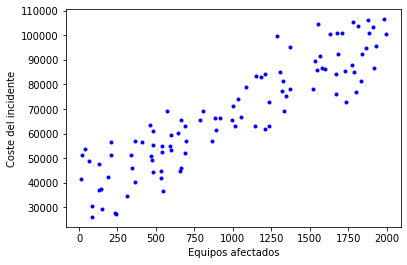

In [12]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()
#hacemos el plot con los datos en la escala original

### 4. Construcción del modelo

In [13]:
from sklearn.linear_model import LinearRegression #para hacer modelo de regresión lineal el python
#instanciar: generar objeto

In [16]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression() 
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values) #ajuste
#variable regresora: n_equipos_afectados (pueden ser varias, lo hacemos matriz)
#habria que ordenar para que no genere sesgo
#cuando ejecutamos tenemos un objeto

LinearRegression()

In [17]:
# Parámetro theta 0
lin_reg.intercept_ #ling_reg objeto y puedo acceder a los atributos haciendo . y el nombre del atributo

36295.29551683299

In [18]:
# Parámetro theta 1
lin_reg.coef_ #los coeficientes son un array porque podemos tener varias variables de regresion

array([32.04726912])

Y = 37328.14 + 30.22*X

In [19]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max) #iintroducimos los datos como matriz no como panda
#como son minimo y maximo trazamos la linea que los une y tenemos la linea

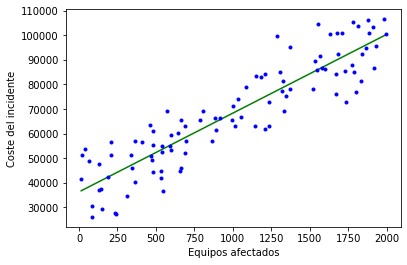

In [20]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()
#podemos ver en el gráfico que no hay un sesgo, hay una proporcion de datos por encima y por debajo de la linea mas o menos igual

### 5. Predicción de nuevos ejemplos

In [21]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")
#el valor cae justo en la linea verde

El coste del incidente sería: 77956 €


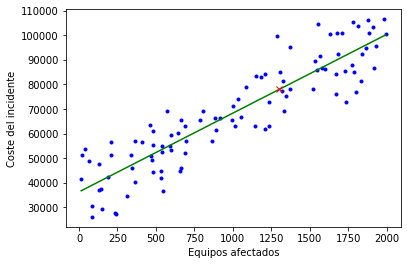

In [22]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()